In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import keras 
%matplotlib inline

In [19]:
def plot_series(time,value,start=0,end=None,label=None):    
    plt.plot(time[start:end],value[start:end],"-",label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend()
    plt.grid(True)

In [20]:
def trend(time,slope=0):
    return time*slope

def seasonal_pattern(season_time):
    return np.where(season_time < 0.4, np.sin(season_time * 2 * np.pi), 1 / np.exp(3 * season_time))

def seasonal_series(time,period,amplitude=1,phase=0):
    season_time = ((time + phase) % period)/period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rd = np.random.RandomState(seed)
    return rd.randn(len(time)) * noise_level

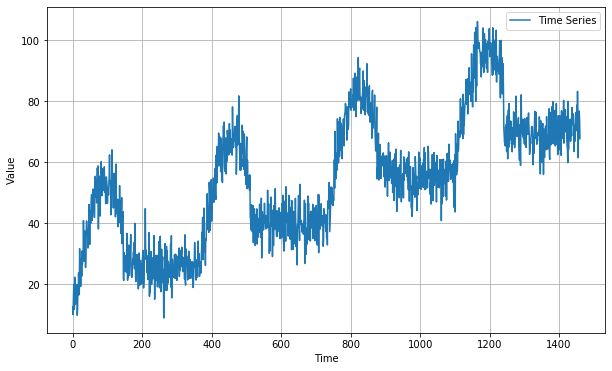

In [21]:
baseline = 10
time = np.arange(4 * 365 + 1)
time_series = baseline + trend(time,slope=0.04) + seasonal_series(time,365,40) + noise(time,noise_level=5,seed=42)
plt.figure(figsize=(10,6))
plot_series(time,time_series,label="Time Series")

In [22]:
split_time = 1000
time_train = time[:split_time]
value_train = time_series[:split_time]
time_valid = time[split_time:]
value_valid = time_series[split_time:]

## Applying Naive Forecast

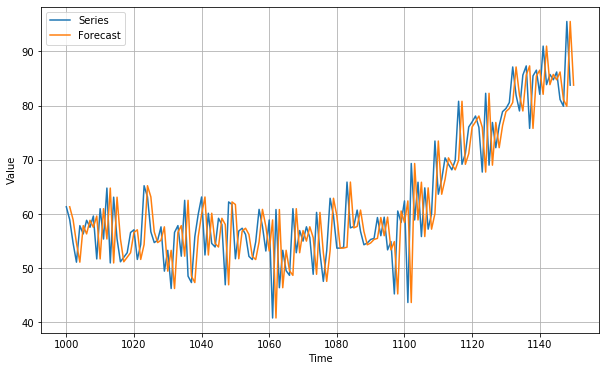

In [23]:
naive_forecast = time_series[split_time-1 : -1]
plt.figure(figsize=(10,6))
plot_series(time_valid,value_valid,start=0,end=150,label="Series")
plot_series(time_valid,naive_forecast,start=1,end=151,label="Forecast")

In [24]:
keras.metrics.mean_absolute_error(value_valid,naive_forecast).numpy()

5.737838433191132

In [25]:
def moving_average_forecast(series,window_size):
    move = np.cumsum(series)
    move[window_size:] = move[window_size:] - move[:-window_size]
    return move[window_size - 1 : -1] / window_size

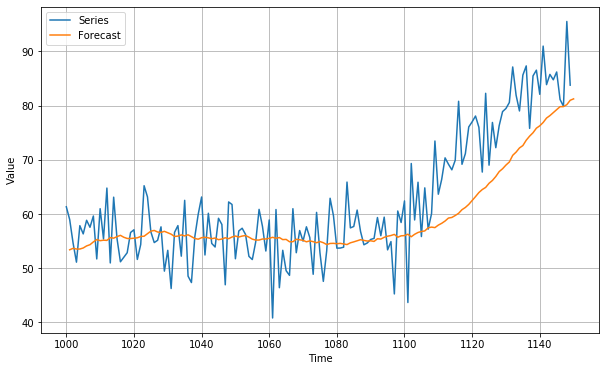

In [26]:
moving_average = moving_average_forecast(time_series, 30)[split_time - 30 : ]
plt.figure(figsize=(10,6))
plot_series(time_valid,value_valid,start=0,end=150,label="Series")
plot_series(time_valid,moving_average,start=1,end=151,label="Forecast")

In [27]:
keras.metrics.mean_absolute_error(value_valid,moving_average).numpy()

5.214200841313388

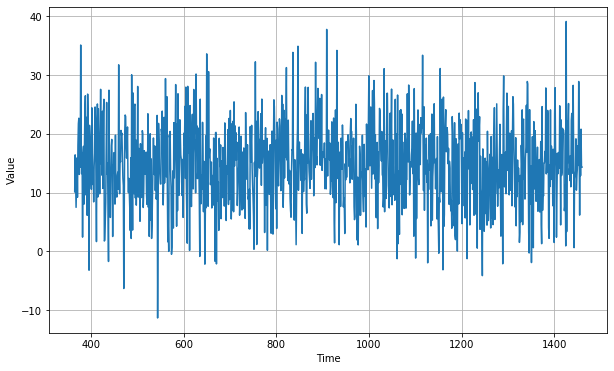

In [28]:
diff_series = time_series[365:] - time_series[:-365]
diff_time = time[365:]
plt.figure(figsize=(10,6))
plot_series(diff_time,diff_series)

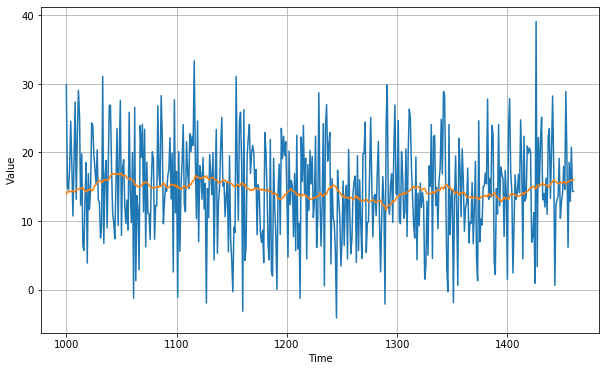

In [29]:
diff_moving_avg = moving_average_forecast(diff_series,50)[split_time - 365 - 50 :]
plt.figure(figsize=(10,6))
plot_series(time_valid,diff_series[split_time - 365:])
plot_series(time_valid,diff_moving_avg)

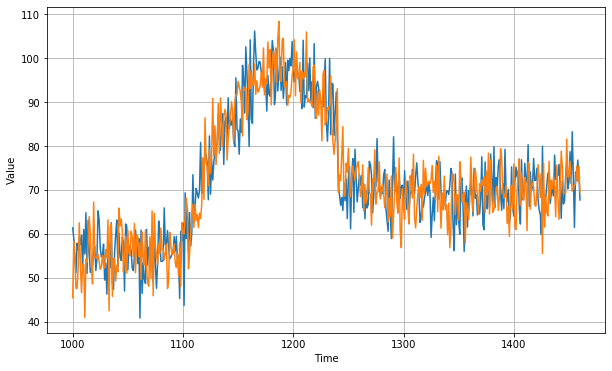

In [30]:
diff_moving_avg_plus_past = time_series[split_time - 365 : -365] + diff_moving_avg
plt.figure(figsize=(10,6))
plot_series(time_valid,value_valid)
plot_series(time_valid,diff_moving_avg_plus_past)

In [31]:
keras.metrics.mean_absolute_error(value_valid,diff_moving_avg_plus_past).numpy()

5.8393105629959

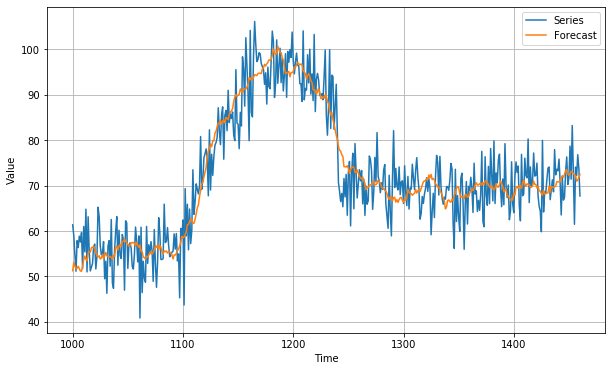

In [32]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(time_series[split_time - 370 : -359],11) + diff_moving_avg
plt.figure(figsize=(10,6))
plot_series(time_valid,value_valid,label="Series")
plot_series(time_valid,diff_moving_avg_plus_smooth_past,label="Forecast")

In [33]:
keras.metrics.mean_absolute_error(value_valid,diff_moving_avg_plus_smooth_past).numpy()

4.306624494476143